In [1]:
import numpy as np
import random, math
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors

from visualize_map import *
%matplotlib inline

obstacle_file = 'world_obstacles.txt'
start_goal_file = 'start_goal.txt'

In [2]:
from vanillaPRM import *

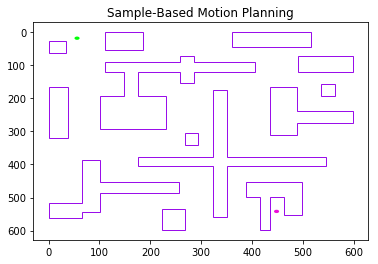

In [3]:
fig, ax = plt.subplots()
path = build_obstacle_course(obstacle_file, ax)
start, goal = add_start_and_goal(start_goal_file, ax)
V = generate_nodes(path, 5)

In [4]:
path

Path(array([[  0.,   0.],
       [  0.,  25.],
       [ 35.,  25.],
       [ 35.,  64.],
       [  0.,  64.],
       [  0.,   0.],
       [110.,   0.],
       [185.,   0.],
       [185.,  54.],
       [110.,  54.],
       [  0.,   0.],
       [360.,   0.],
       [516.,   0.],
       [516.,  44.],
       [360.,  44.],
       [  0.,   0.],
       [  0., 165.],
       [ 38., 165.],
       [ 38., 320.],
       [  0., 320.],
       [  0.,   0.],
       [111.,  90.],
       [258.,  90.],
       [258.,  73.],
       [285.,  73.],
       [285.,  90.],
       [405.,  90.],
       [405., 119.],
       [285., 119.],
       [285., 155.],
       [258., 155.],
       [258., 119.],
       [175., 119.],
       [175., 193.],
       [230., 193.],
       [230., 293.],
       [102., 293.],
       [102., 192.],
       [148., 192.],
       [148., 119.],
       [111., 119.],
       [  0.,   0.],
       [490.,  73.],
       [598.,  73.],
       [598., 120.],
       [490., 120.],
       [  0.,   0.],
       [

In [7]:
path.codes

array([ 1,  1,  2,  2,  2, 79,  1,  2,  2,  2, 79,  1,  2,  2,  2, 79,  1,
        2,  2,  2, 79,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2, 79,  1,  2,  2,  2, 79,  1,  2,  2,  2,
       79,  1,  2,  2,  2,  2,  2,  2,  2, 79,  1,  2,  2,  2, 79,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 79,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2, 79,  1,  2,  2,  2, 79,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2, 79], dtype=uint8)

In [8]:
k = 2
nodes = V
nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='brute').fit(nodes)
distances, indices = nbrs.kneighbors(nodes)

In [9]:
E_obs = edges_obstacles(path)
E = []

for i in range(len(nodes)):
    q = tuple(nodes[i].tolist())
    kindices = indices[i, 1:]
    #print(q, knbrs)
    for j in kindices:
        qj = tuple(nodes[j].tolist())
        if (q, qj) not in E and (qj, q) not in E:
            for k in E_obs:
                if intersect(q, qj, k[0], k[1]):
                    break
            else:
                E.append((q, qj))

In [12]:
sg = np.array((start,goal))

In [13]:
sg

array([[ 56,  18],
       [448, 542]])

In [15]:
V

[array([199.03708056,  27.47411172]),
 array([587.51222514, 177.84138009]),
 array([467.18908661,  91.04347942]),
 array([46.01743523, 60.92501891]),
 array([388.36394394,  59.20607694])]

In [26]:
dist = dict()
for i in V:
    dist[tuple(i.tolist())] = manhattan_dist(i, start)
knear = []
for i in range(5):
    minpoint = min(dist, key=dist.get)
    knear.append(minpoint)
    del dist[minpoint]
    

In [27]:
knear

[(587.5122251392856, 177.84138008792934),
 (467.18908661298946, 91.04347941645392),
 (388.36394393935, 59.20607693831024),
 (199.0370805620771, 27.47411172041079),
 (46.017435233763, 60.92501891016835)]

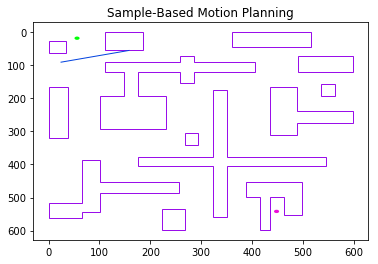

In [28]:
fig, ax = plt.subplots()
build_obstacle_course(obstacle_file, ax)
start, goal = add_start_and_goal(start_goal_file, ax)
for j in E:
    b=Path(j)
    bpatch = patches.PathPatch(b,facecolor='None', edgecolor='xkcd:blue')
    ax.add_patch(bpatch)

(108, 2)

In [52]:
v = path.vertices

In [54]:
v

array([[  0.,   0.],
       [  0.,  25.],
       [ 35.,  25.],
       [ 35.,  64.],
       [  0.,  64.],
       [  0.,   0.],
       [110.,   0.],
       [185.,   0.],
       [185.,  54.],
       [110.,  54.],
       [  0.,   0.],
       [360.,   0.],
       [516.,   0.],
       [516.,  44.],
       [360.,  44.],
       [  0.,   0.],
       [  0., 165.],
       [ 38., 165.],
       [ 38., 320.],
       [  0., 320.],
       [  0.,   0.],
       [111.,  90.],
       [258.,  90.],
       [258.,  73.],
       [285.,  73.],
       [285.,  90.],
       [405.,  90.],
       [405., 119.],
       [285., 119.],
       [285., 155.],
       [258., 155.],
       [258., 119.],
       [175., 119.],
       [175., 193.],
       [230., 193.],
       [230., 293.],
       [102., 293.],
       [102., 192.],
       [148., 192.],
       [148., 119.],
       [111., 119.],
       [  0.,   0.],
       [490.,  73.],
       [598.,  73.],
       [598., 120.],
       [490., 120.],
       [  0.,   0.],
       [535.,

In [28]:
for i in range(len(v)-1):
    if v[i] == [0., 0.]:
        start = v[i+1]

In [56]:
print(path.codes)

[ 1  1  2  2  2 79  1  2  2  2 79  1  2  2  2 79  1  2  2  2 79  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 79  1  2  2  2 79  1
  2  2  2 79  1  2  2  2  2  2  2  2 79  1  2  2  2 79  1  2  2  2  2  2
  2  2  2  2  2  2 79  1  2  2  2  2  2  2  2  2  2  2  2 79  1  2  2  2
 79  1  2  2  2  2  2  2  2  2  2 79]


In [24]:
e = []
for i in range(1, len(path)-1):
    if path.codes[i] == 1: 
        start = path.vertices[i]
    elif path.codes[i] == 79:
        continue
    elif path.codes[i+1] == 79:
        e.append((path.vertices[i], start))
        continue
    e.append((path.vertices[i], path.vertices[i+1]))
e = np.array(e)
    
    
    

In [28]:
np.shape(e)

(94, 2, 2)

In [29]:
e[0]

array([[ 0., 25.],
       [35., 25.]])

In [7]:
other

Path(array([[  0.,   0.],
       [100., 100.]]), None)